In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as sk
from ast import literal_eval

data = pd.read_csv("../data/movies_metadata.csv")
# data = data[data['original_language']]
data = data[['budget', 'genres','id', 'imdb_id','original_title', 'popularity', 'release_date', 'revenue', 'runtime', 'vote_average', 'vote_count', 'original_language', 'production_companies']]
data = data[(data['genres'] != "[]")]
data['genres'] = data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
data.dropna(inplace=True)
data = data[(data.T != 0).all()]
data.head()

,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,original_language,production_companies
0,30000000.0,"[Animation, Comedy, Family]",862.0,tt0114709,Toy Story,21.946943,30/10/1995,373554033.0,81.0,7.7,5415.0,en,"[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,65000000.0,"[Adventure, Fantasy, Family]",8844.0,tt0113497,Jumanji,17.015539,15/12/1995,262797249.0,104.0,6.9,2413.0,en,"[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
3,16000000.0,"[Comedy, Drama, Romance]",31357.0,tt0114885,Waiting to Exhale,3.859495,22/12/1995,81452156.0,127.0,6.1,34.0,en,[{'name': 'Twentieth Century Fox Film Corporat...
5,60000000.0,"[Action, Crime, Drama, Thriller]",949.0,tt0113277,Heat,17.924927,15/12/1995,187436818.0,170.0,7.7,1886.0,en,"[{'name': 'Regency Enterprises', 'id': 508}, {..."
8,35000000.0,"[Action, Adventure, Thriller]",9091.0,tt0114576,Sudden Death,5.231580,22/12/1995,64350171.0,106.0,5.5,174.0,en,"[{'name': 'Universal Pictures', 'id': 33}, {'n..."


In [2]:
reg = sk.LinearRegression()
reg.fit(data[['budget']],data['revenue'])


LinearRegression()

In [3]:
coe = reg.coef_
coe

array([3.0210158])

In [4]:
interce = reg.intercept_
interce

-3611395.8790510595

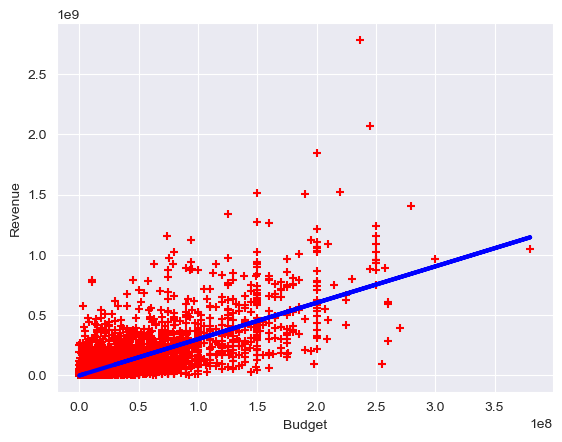

In [5]:
plt.scatter(data['budget'], data['revenue'], marker="+", color="red")
plt.plot(data[['budget']],reg.predict(data[['budget']]),color="blue",linewidth=3) #line
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

In [6]:
x = 3000000
y = coe*x + interce
y

array([5451651.53493028])

In [7]:
reg.score(data[['budget']],data['revenue'])

0.5327740655763422

Correlation between budget and revenue is:  0.7299137384488268


Text(0, 0.5, 'Budget')

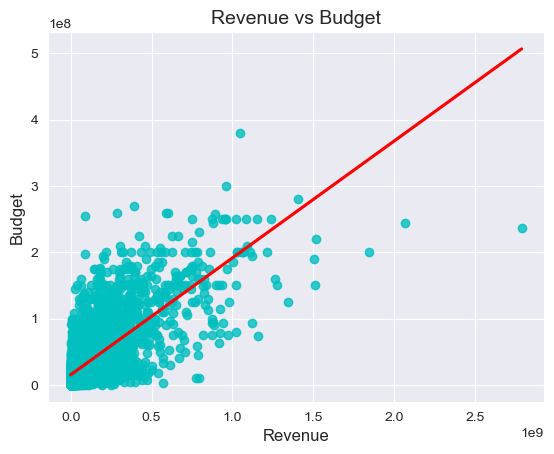

In [8]:
# find correlation between budget and revenue
data_corr = data.corr()
print("Correlation between budget and revenue is: ", data_corr.loc['revenue','budget'])

ax = sns.regplot(x=data['revenue'], y=data['budget'], color='c', ci=None, line_kws={'color': 'red'})
ax.set_title("Revenue vs Budget", fontsize=14)
ax.set_xlabel("Revenue", fontsize=12)
ax.set_ylabel("Budget", fontsize=12)


Correlation between Popularity And Profit is:  0.43519869501539044


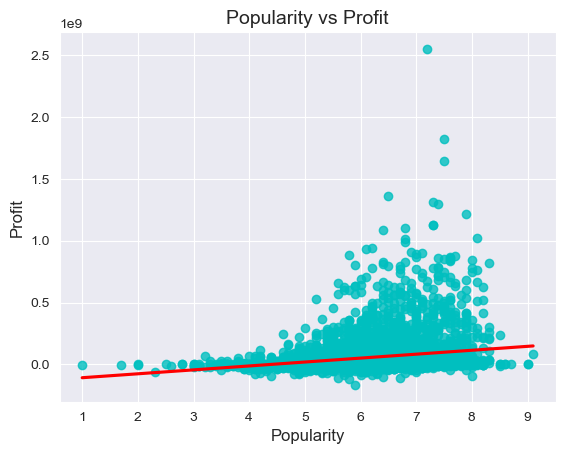

In [9]:
# find correlation between popularity and Profit
data['Profit'] = data['revenue'] - data['budget']
data_corr2 = data.corr()
ax = sns.regplot(x=data['vote_average'], y=data['Profit'], color='c', ci=None, line_kws={'color': 'red'})
ax.set_title("Popularity vs Profit", fontsize=14)
ax.set_xlabel("Popularity", fontsize=12)
ax.set_ylabel("Profit", fontsize=12)
print("Correlation between Popularity And Profit is: ", data_corr2.loc['popularity','Profit'])

In [10]:
#month_release = data['release_date'].dt.year
#month_release

C:\Users\ch__s\AppData\Local\Temp\ipykernel_25252\2863901353.py:3: UserWarning: Parsing '30/10/1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['release_date'] = pd.to_datetime(data['release_date'])
C:\Users\ch__s\AppData\Local\Temp\ipykernel_25252\2863901353.py:3: UserWarning: Parsing '15/12/1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['release_date'] = pd.to_datetime(data['release_date'])
C:\Users\ch__s\AppData\Local\Temp\ipykernel_25252\2863901353.py:3: UserWarning: Parsing '22/12/1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['release_date'] = pd.to_datetime(data['release_date'])
C:\Users\ch__s\AppData\Local\Temp\ipykernel_25252\2863901353.py:3: UserWarning: Parsing '16/11/1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['releas

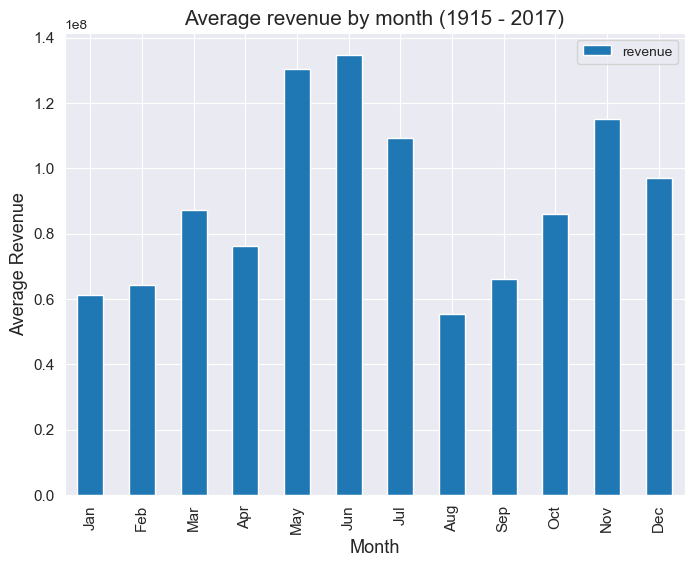

In [11]:
# change string format to datetime format
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
data['release_date'] = pd.to_datetime(data['release_date'])
data['release_date'].head()

month_release = data['release_date'].dt.month


month_release = pd.DataFrame(month_release)
month_release.rename(columns = {'release_date':'release_month'},inplace=True)
month_release['revenue'] = data['revenue']
mean_revenue  = month_release.groupby('release_month').mean()
mean_revenue['month'] = months

mean_revenue.plot(x='month',kind='bar',figsize = (8,6),fontsize=11)

plt.title('Average revenue by month (1915 - 2017)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Revenue',fontsize = 13)
sns.set_style("darkgrid")

<AxesSubplot:xlabel='revenue', ylabel='runtime'>

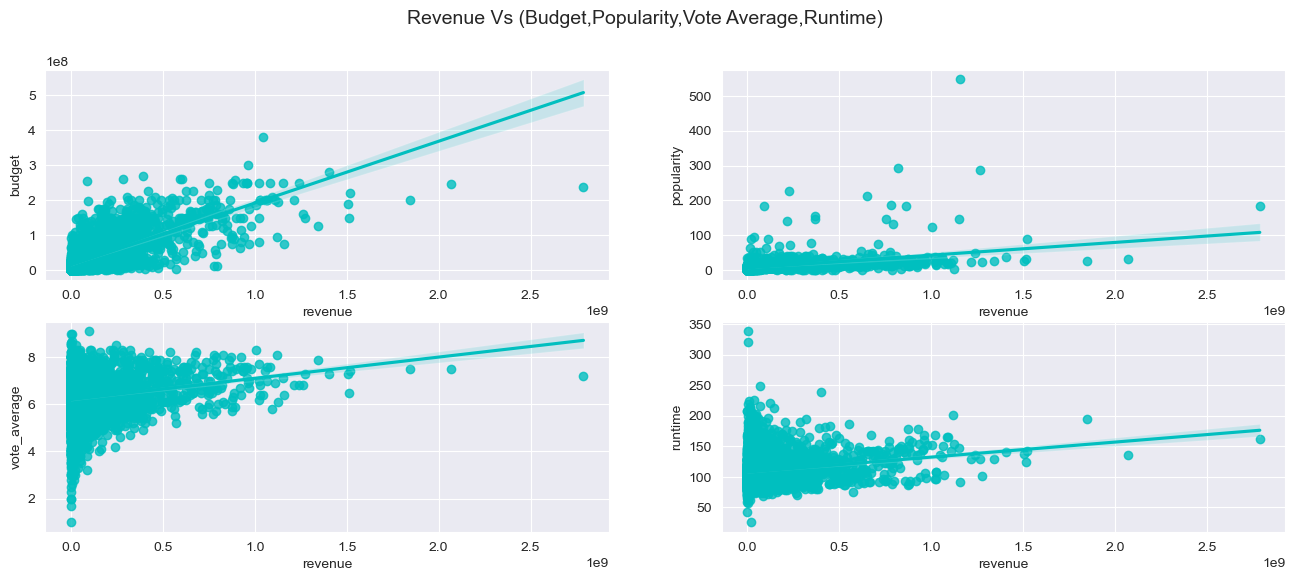

In [12]:
fig, axes = plt.subplots(2,2,figsize = (16,6))
fig.suptitle("Revenue Vs (Budget,Popularity,Vote Average,Runtime)",fontsize=14)
#info.plot(x = ['revenue'],y = ['budget'],kind = "scatter",ax = axes[0][0])
sns.regplot(x=data['revenue'], y=data['budget'],color='c',ax=axes[0][0])
sns.regplot(x=data['revenue'], y=data['popularity'],color='c',ax=axes[0][1])
sns.regplot(x=data['revenue'], y=data['vote_average'],color='c',ax=axes[1][0])
sns.regplot(x=data['revenue'], y=data['runtime'],color='c',ax=axes[1][1])
#axes.scatter(info['revenue'],info['vote_average'])


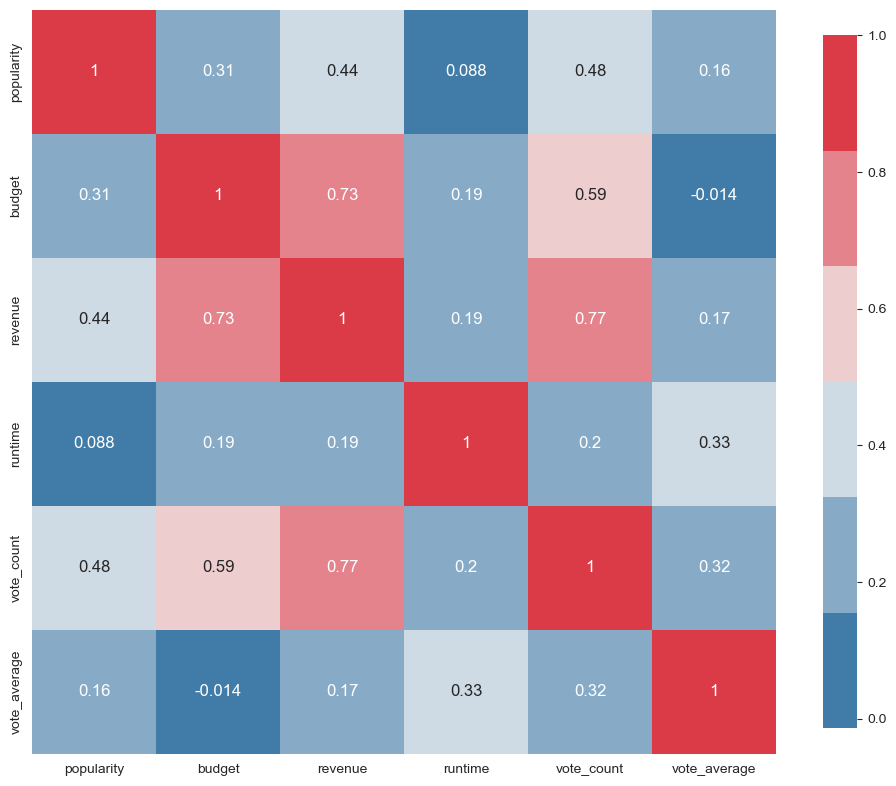

In [13]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize = ( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

plot_correlation_map(data[['popularity','budget','revenue','runtime','vote_count','vote_average']])

<AxesSubplot:>

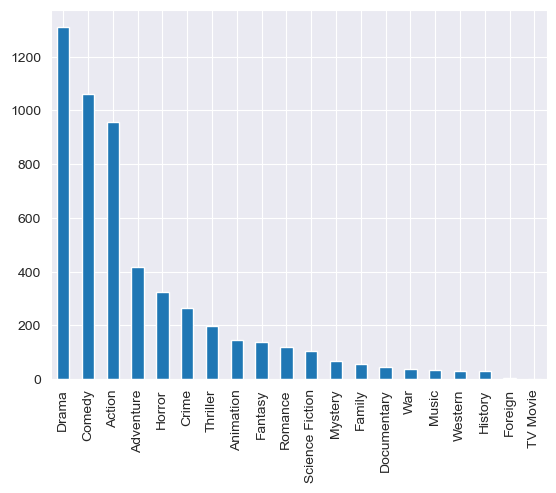

In [14]:
genres = data['genres'].str[0]
data1 = pd.Series(genres)
count = data1.value_counts(ascending=False)
count

count.plot(kind="bar")

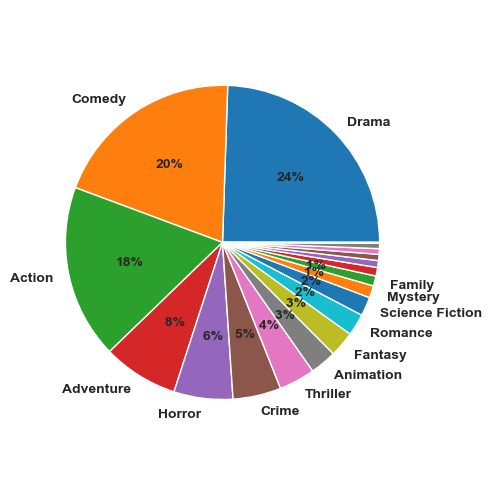

In [15]:
total_genre_movies = count
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1

plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(5, 5))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

In [16]:
# Function to extract the list of Name
# From Columns Contains List of Names
import ast
def getDataList(df, xfeature):
    xlst = []
    for x, xRows in df.iterrows():
        target_column = xRows[xfeature]
        if (target_column != 'unknown'):
            strName = ast.literal_eval( target_column )
            for i in strName:
                if(i['name'] != ''):
                    xlst.append(i['name'])
        else:
            xlst.append('unknown')
    return xlst


In [17]:

getlist_companies = getDataList(data, 'production_companies')
print("\nLenght of List: ", len(getlist_companies) )
getlist_companies


Lenght of List:  15808


['Pixar Animation Studios',
 'TriStar Pictures',
 'Teitler Film',
 'Interscope Communications',
 'Twentieth Century Fox Film Corporation',
 'Regency Enterprises',
 'Forward Pass',
 'Warner Bros.',
 'Universal Pictures',
 'Imperial Entertainment',
 'Signature Entertainment',
 'United Artists',
 'Eon Productions',
 'Columbia Pictures',
 'Castle Rock Entertainment',
 'Hollywood Pictures',
 'Cinergi Pictures Entertainment',
 'Le Studio Canal+',
 'Laurence Mark Productions',
 'Metro-Goldwyn-Mayer (MGM)',
 'Carolco Pictures',
 'Universal Pictures',
 'Légende Entreprises',
 'Syalis DA',
 'De Fina-Cappa',
 'Columbia Pictures Corporation',
 'Mirage Enterprises',
 'Miramax Films',
 'A Band Apart',
 'O Entertainment',
 'Warner Bros.',
 'Morgan Creek Productions',
 'Columbia Pictures',
 'Jersey Films',
 'Metro-Goldwyn-Mayer (MGM)',
 'Silver Pictures',
 'Canal+',
 'Warner Bros.',
 'Dino De Laurentiis Company',
 'Donner/Shuler-Donner Productions',
 'Evansgideon/Lazar',
 'United Artists',
 'Intial Pr

In [18]:
# Create New Dataset for Countries
dfmovies_companies = pd.DataFrame(columns=['name', 'movies'])
dfmovies_companies['name'] = getlist_companies # Add Data from list to name column
print("\nDataset Shape: ", dfmovies_companies.shape ) # Shape of Dataset

#dfmovies_genres.drop(dfmovies_genres[dfmovies_genres['name'] == 'unknown'].index, inplace=True)
dfmovies_companies = dfmovies_companies.groupby('name').agg({'movies': 'size'}).reset_index().sort_values('movies', ascending=False)
dfmovies_companies.head(10)


Dataset Shape:  (15808, 2)


,name,movies
5198,Warner Bros.,418
5028,Universal Pictures,386
3566,Paramount Pictures,340
4943,Twentieth Century Fox Film Corporation,296
1048,Columbia Pictures,210
3288,New Line Cinema,174
3044,Metro-Goldwyn-Mayer (MGM),164
5185,Walt Disney Pictures,132
4875,Touchstone Pictures,129
1049,Columbia Pictures Corporation,117


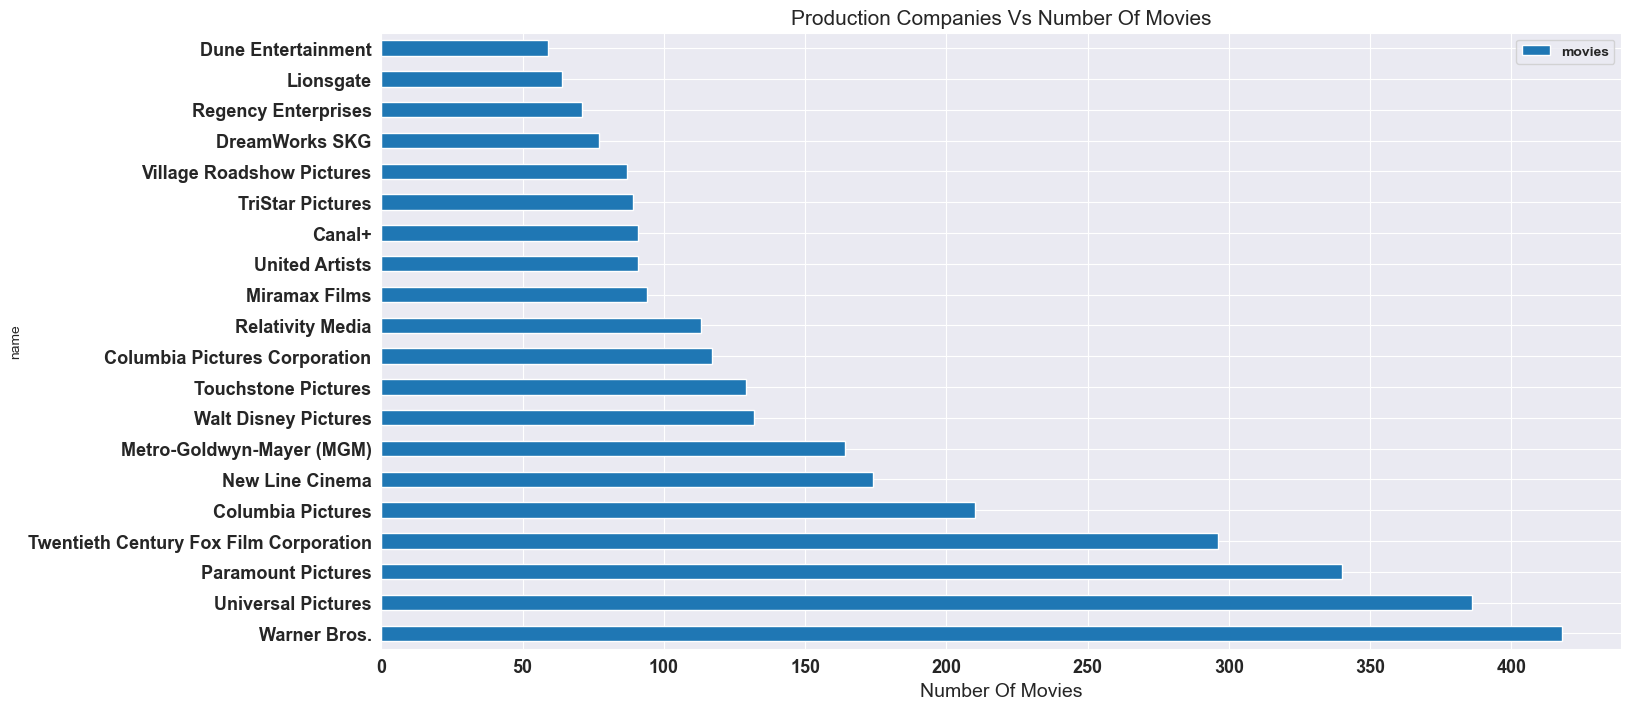

In [19]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies released by each production company.


# plot he barh plot.
dfmovies_companies.set_index('name')
dfmovies_companies.set_index('name').iloc[:20].plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Production Companies Vs Number Of Movies",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=14)
sns.set_style("whitegrid")

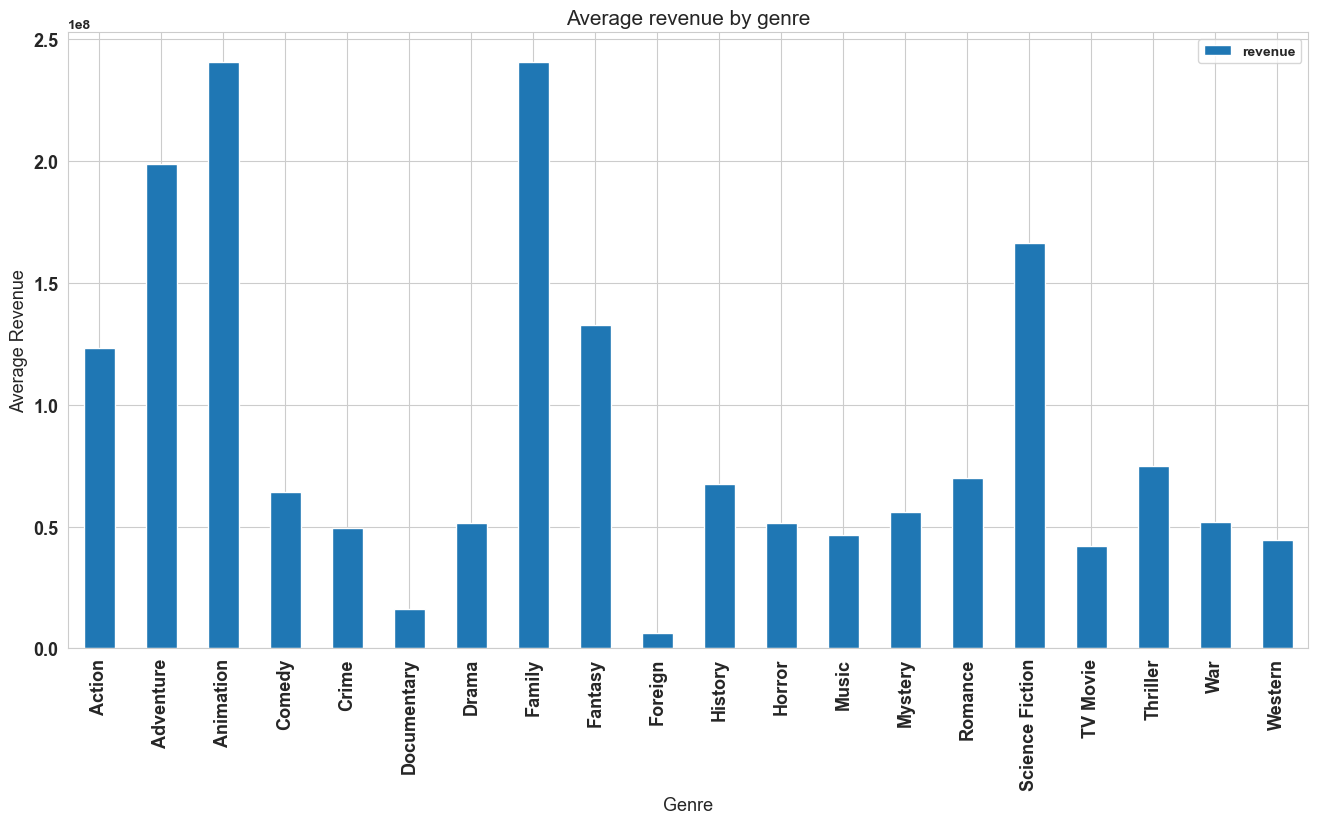

In [20]:
rev_genres = genres
rev_genres  = pd.DataFrame(rev_genres )
rev_genres ['revenue'] = data['revenue']
mean_revenue  = rev_genres.groupby('genres').mean()
mean_revenue.iloc[:20].plot(kind='bar',figsize=(16,8),fontsize=13)
# mean_revenue.plot(kind='barh',figsize = (8,6),fontsize=11)
#
plt.title('Average revenue by genre',fontsize = 15)
plt.xlabel('Genre',fontsize = 13)
plt.ylabel('Average Revenue',fontsize = 13)
sns.set_style("darkgrid")

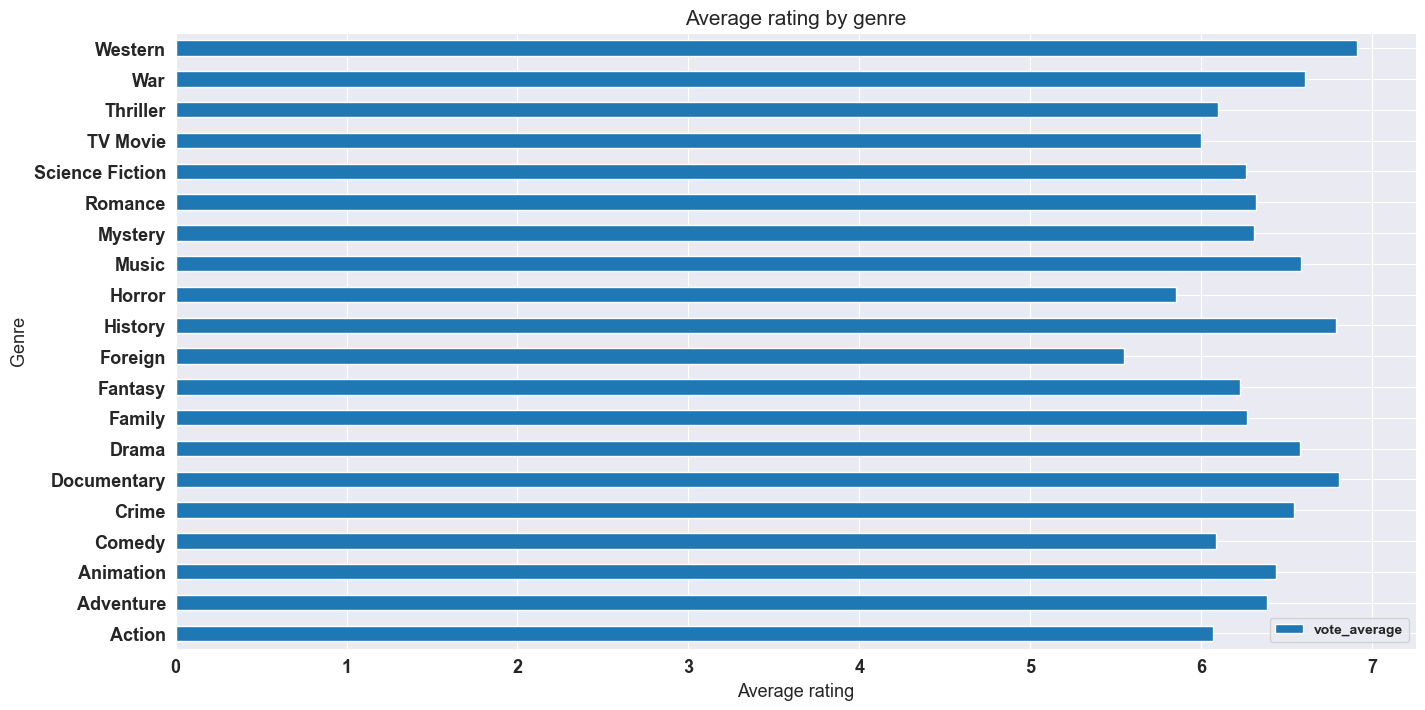

In [21]:
rev_genres = genres
rev_genres  = pd.DataFrame(rev_genres )
rev_genres ['vote_average'] = data['vote_average']
mean_rating = rev_genres.groupby('genres').mean()
mean_rating.plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title('Average rating by genre',fontsize = 15)
plt.xlabel('Average rating',fontsize = 13)
plt.ylabel('Genre',fontsize = 13)
sns.set_style("darkgrid")


In [22]:

getlist_companies = getDataList(data, 'production_companies')
print("\nLenght of List: ", len(getlist_companies) )
getlist_companies
yo = pd.DataFrame(getlist_companies)



Lenght of List:  15808


In [23]:
# Create New Dataset for Countries
dfmovies_companies = pd.DataFrame(columns={'name', 'movies'})
dfmovies_companies['name'] = getlist_companies # Add Data from list to name column
print("\nDataset Shape: ", dfmovies_companies.shape ) # Shape of Dataset

#dfmovies_genres.drop(dfmovies_genres[dfmovies_genres['name'] == 'unknown'].index, inplace=True)
dfmovies_companies = dfmovies_companies.groupby('name').agg({'movies': 'size'}).reset_index().sort_values('movies', ascending=False)
dfmovies_companies.head(10)


Dataset Shape:  (15808, 2)


,name,movies
5198,Warner Bros.,418
5028,Universal Pictures,386
3566,Paramount Pictures,340
4943,Twentieth Century Fox Film Corporation,296
1048,Columbia Pictures,210
3288,New Line Cinema,174
3044,Metro-Goldwyn-Mayer (MGM),164
5185,Walt Disney Pictures,132
4875,Touchstone Pictures,129
1049,Columbia Pictures Corporation,117


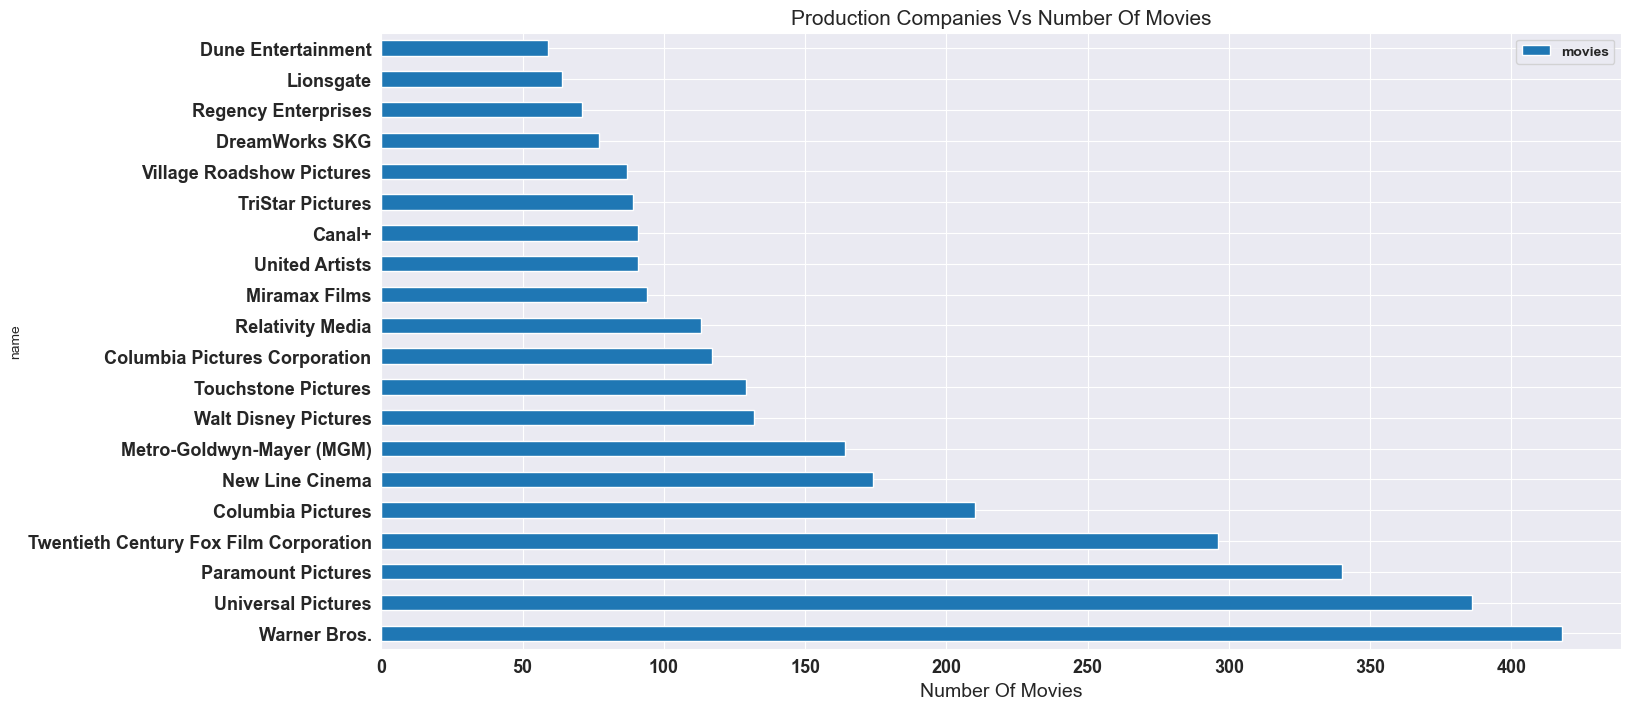

In [24]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies released by each production company.


# plot he barh plot.
dfmovies_companies.set_index('name')
dfmovies_companies.set_index('name').iloc[:20].plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Production Companies Vs Number Of Movies",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=14)
sns.set_style("whitegrid")

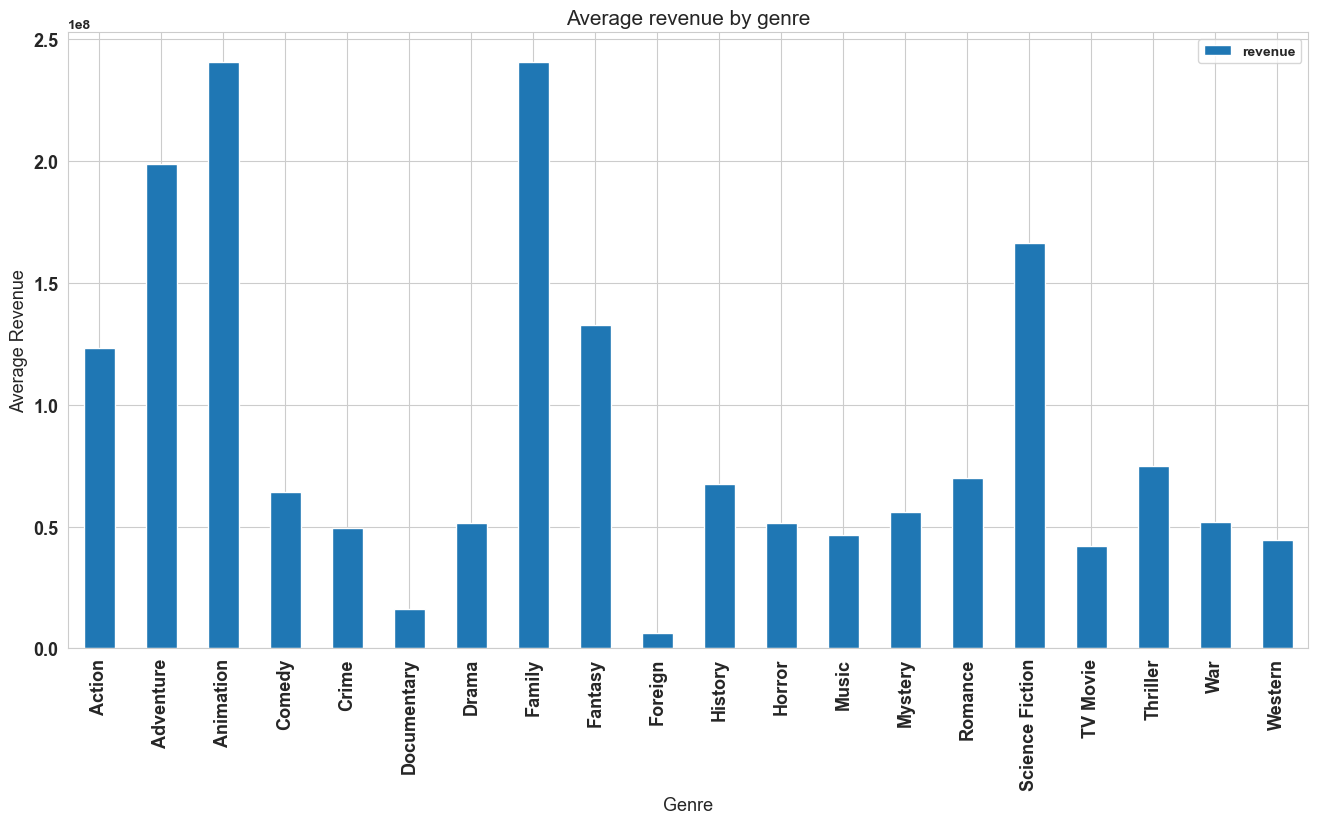

In [25]:
rev_genres = genres
rev_genres  = pd.DataFrame(rev_genres )
rev_genres ['revenue'] = data['revenue']
mean_revenue  = rev_genres.groupby('genres').mean()
mean_revenue.iloc[:20].plot(kind='bar',figsize=(16,8),fontsize=13)
# mean_revenue.plot(kind='barh',figsize = (8,6),fontsize=11)
#
plt.title('Average revenue by genre',fontsize = 15)
plt.xlabel('Genre',fontsize = 13)
plt.ylabel('Average Revenue',fontsize = 13)
sns.set_style("darkgrid")

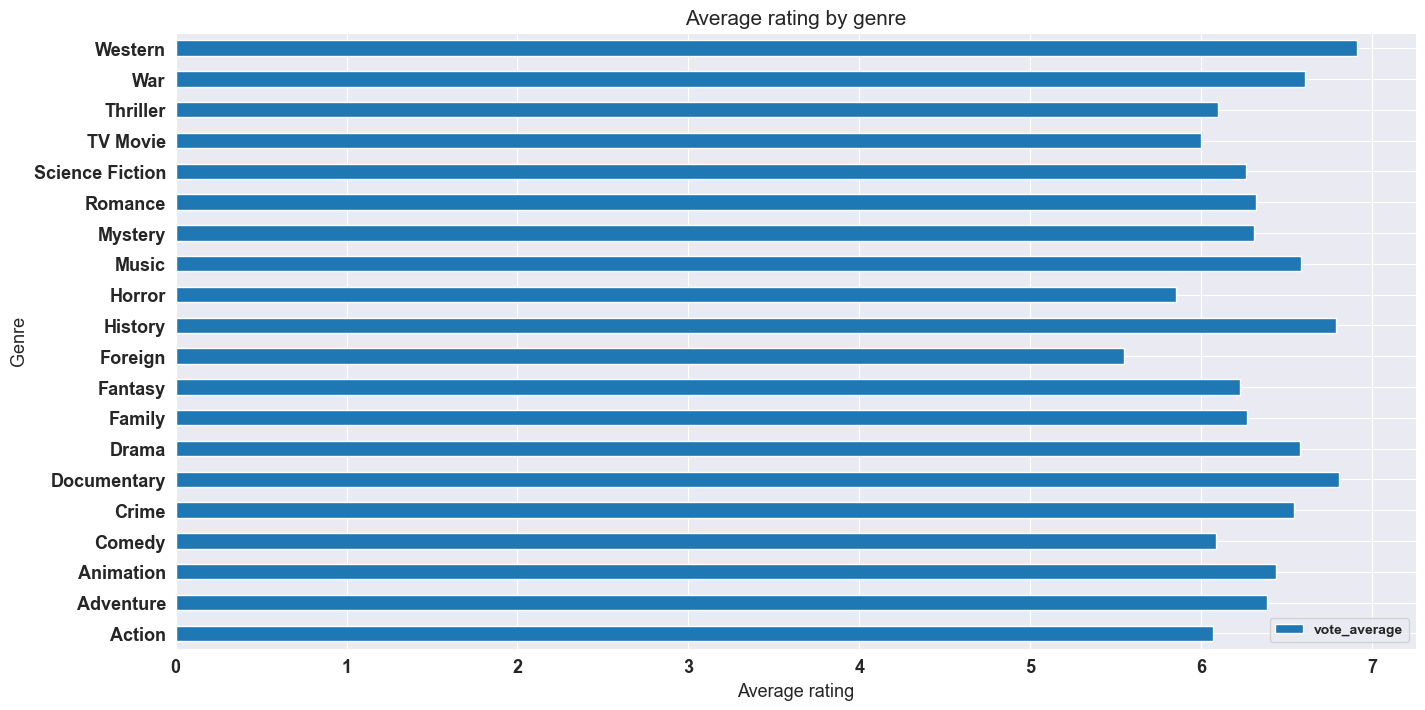

In [26]:
rev_genres = genres
rev_genres  = pd.DataFrame(rev_genres )
rev_genres ['vote_average'] = data['vote_average']
mean_rating = rev_genres.groupby('genres').mean()
mean_rating.plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title('Average rating by genre',fontsize = 15)
plt.xlabel('Average rating',fontsize = 13)
plt.ylabel('Genre',fontsize = 13)
sns.set_style("darkgrid")
